# AccelerateAI

## Clustering: Solution to Assignment 10 - Q1

### Problem Statement

Company X would like to enter the market with a new beer brand. 

Before it decides the kind of beer it will launch, it must understand what kinds of products already exist in the market and what kinds of segments the products address. 

To understand the segments, the company collects specifications of few samples of beer brands (as given in the Beer Dataset). Please refer to Beer Grouping dataset on GitHub - https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/ClassAssignment/Assignment10/Beer_Grouping.xlsx

Assuming there are 3 segments, use K-Means Algorithm to create three clusters using the Beer Dataset. Once the clusters are finalized, interpret the clusters.


### Solution

In [1]:
# Load packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload your data as a csv file and load it as a data frame 
df = pd.read_excel('./Beer_Grouping.xlsx').dropna()
df.head()

,Name,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      20 non-null     object 
 1   Calories  20 non-null     int64  
 2   Sodium    20 non-null     int64  
 3   Alcohol   20 non-null     float64
 4   Cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 960.0+ bytes


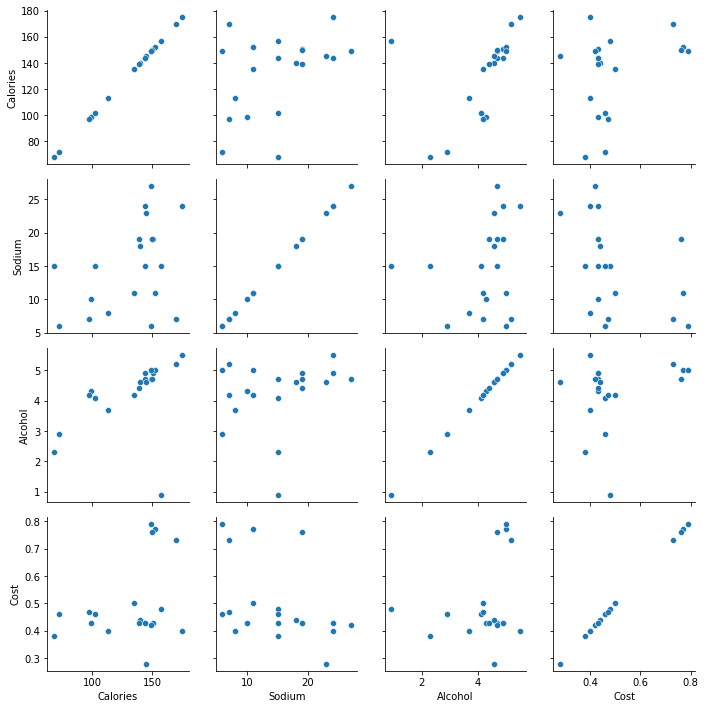

In [4]:
# Visualize the correlation of your data and identify variables for further analysis
g = sns.PairGrid(df)
g.map(sns.scatterplot)

plt.show()

In [5]:
df.head(5)

,Name,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [6]:
df_LE = df.copy()

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_LE['Name'] = labelencoder.fit_transform(df_LE['Name'])

df_LE.head(3)

,Name,Calories,Sodium,Alcohol,Cost
0,2,144,15,4.7,0.43
1,17,151,19,4.9,0.43
2,11,157,15,0.9,0.48


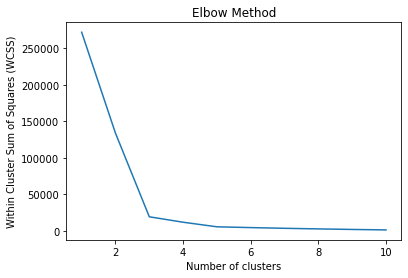

In [7]:
X = np.array(df_LE.loc[:,['Name','Calories', 'Sodium', 'Alcohol', 'Cost']]).reshape(-1, 2)

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

We can go ahead with 3 clusters (as also clear from above elbow method)

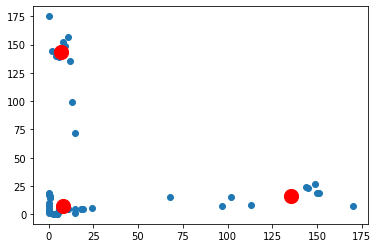

In [8]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [9]:
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.inertia_

19412.595437152777

In [10]:
kmeans.cluster_centers_

array([[  8.3259375 ,   7.601875  ],
       [135.66666667,  16.55555556],
       [  7.22222222, 143.33333333]])

In [11]:
kmeans.labels_

array([2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 0])

Now, we will add the cluster label to the existing data to get the clusters assigned.

In [12]:
kmeans_selection = KMeans(init='k-means++', n_clusters=3,n_init=100, random_state=1).fit(df_LE)
labels = pd.DataFrame(kmeans_selection.labels_)
clustered_data = df_LE.assign(Cluster=labels)

clustered_data

,Name,Calories,Sodium,Alcohol,Cost,Cluster
0,2,144,15,4.7,0.43,0
1,17,151,19,4.9,0.43,0
2,11,157,15,0.9,0.48,0
3,10,170,7,5.2,0.73,0
4,8,152,11,5.0,0.77,0
5,14,145,23,4.6,0.28,0
6,0,175,24,5.5,0.40,0
7,19,149,27,4.7,0.42,0
8,13,99,10,4.3,0.43,1
9,3,113,8,3.7,0.40,1


In [13]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)

# Printing the clusters
grouped_km

,Name,Calories,Sodium,Alcohol,Cost
Cluster,,,,,
0,8.6,150.0,17.0,4.5,0.5
1,9.8,102.8,10.0,4.1,0.4
2,15.5,70.0,10.5,2.6,0.4


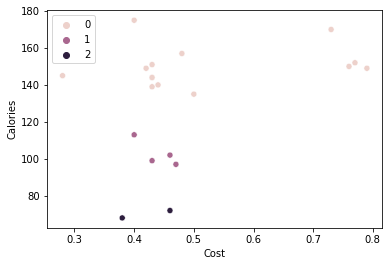

In [14]:
sns.scatterplot(data=df_LE, x="Cost", y="Calories", hue=kmeans_selection.labels_ )
plt.show()

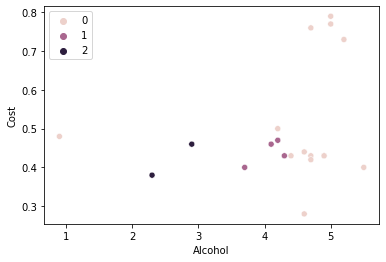

In [15]:
sns.scatterplot(data=df_LE, x="Alcohol", y="Cost", hue=kmeans_selection.labels_)
plt.show()

**Interpretations:**

Some of the inferences could be as follows:
- 3 categories/clusters emerge
- Cluster0 seems to have high beer prices/cost associated with it, hence it is premium segment. The other features can be attributed and studied accordingly for this group.
- Calories for Cluster0 beers also seem to be higher than others
- Average Sodium level for beers in Cluster0 segment also seems to be higher than the rest.

This is just an indication. Based on above outcomes, you can analyze accordingly.